In [5]:
import numpy as np
import cv2
from tqdm import tqdm

In [2]:
data = np.load('test_close.npz')

In [3]:
cv2.imshow('x', data['images'][0])
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
for i,img in tqdm(enumerate(data['images'])):
    cv2.imwrite(f'images/{i}.jpg', img)

1191it [00:03, 317.57it/s]


In [9]:
np.save('poses.npy', data['poses'])

In [1]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

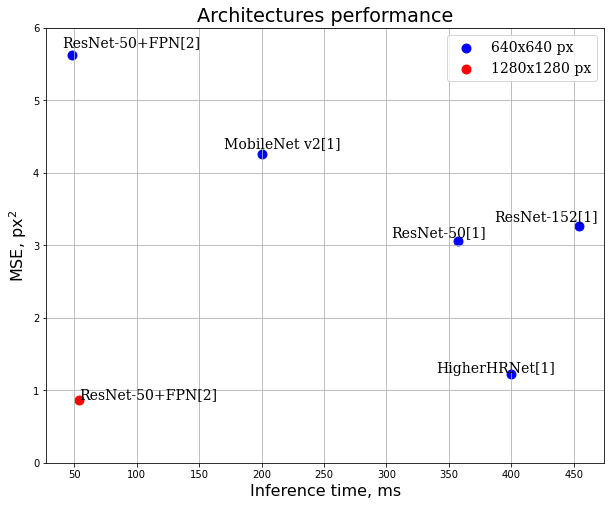

In [2]:
inference = [454, 357, 400, 200, 48]
accuracy = [3.27, 3.06, 1.22, 4.26, 5.62]
fig, axs = plt.subplots(figsize=(10,8))

labels=['ResNet-152[1]', 'ResNet-50[1]', 'HigherHRNet[1]', 'MobileNet v2[1]', 'ResNet-50+FPN[2]']
axs.scatter(inference,accuracy,
            c='b', label='640x640 px', s=80)
#            cmap='winter')


font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : 14}

matplotlib.rc('font', **font)

for i, txt in enumerate(labels):
    axs.annotate(txt, (inference[i]*0.85, accuracy[i]*1.02))

axs.scatter(54, 0.87, c='r', label='1280x1280 px', s=80)

axs.annotate('ResNet-50+FPN[2]', (54, 0.88))
axs.legend()


font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : 16}

matplotlib.rc('font', **font)


axs.set_ylim(0,6)
axs.set_title("Architectures performance")
axs.set_ylabel('MSE, px${}^2$', fontsize=16)
axs.set_xlabel('Inference time, ms', fontsize=16)
axs.grid()

plt.show()